## Load the Dataset

In [1]:
import pandas as pd

df = pd.read_csv("/content/DSL-StrongPasswordData.csv")
df.head()

subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t     H.t  \
0    s002             1    1    0.1491       0.3979       0.2488  0.1069   
1    s002             1    2    0.1111       0.3451       0.2340  0.0694   
2    s002             1    3    0.1328       0.2072       0.0744  0.0731   
3    s002             1    4    0.1291       0.2515       0.1224  0.1059   
4    s002             1    5    0.1249       0.2317       0.1068  0.0895   

   DD.t.i  UD.t.i     H.i  ...     H.a  DD.a.n  UD.a.n     H.n  DD.n.l  \
0  0.1674  0.0605  0.1169  ...  0.1349  0.1484  0.0135  0.0932  0.3515   
1  0.1283  0.0589  0.0908  ...  0.1412  0.2558  0.1146  0.1146  0.2642   
2  0.1291  0.0560  0.0821  ...  0.1621  0.2332  0.0711  0.1172  0.2705   
3  0.2495  0.1436  0.1040  ...  0.1457  0.1629  0.0172  0.0866  0.2341   
4  0.1676  0.0781  0.0903  ...  0.1312  0.1582  0.0270  0.0884  0.2517   

   UD.n.l     H.l  DD.l.Return  UD.l.Return  H.Return  
0  0.2583  0.1338       0.3509       0.2171    0.0742  
1  0.1496  0.0839       0.2756       0.1917    0.0747  
2  0.1533  0.1085       0.2847       0.1762    0.0945  
3  0.1475  0.0845       0.3232       0.2387    0.0813  
4  0.1633  0.0903       0.2517       0.1614    0.0818  

[5 rows x 34 columns]

In [2]:
#Create a list of dataframes with each dataframe corresponding to data for a particular session
#Normalize all the timings
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn import metrics

session_df = []

for i in set(df['sessionIndex']):
  session = df.loc[df['sessionIndex'] == i]
  session = session.reset_index()
  session.drop(columns = ['index'], inplace = True)

  for j in list(df.columns)[3:]:
    session[j] = (session[j] - session[j].mean())/session[j].std()

  session_df.append(session)

## Try Out Different Clustering Methods

In [3]:
#Standard Spectral Clustering
for session in range(len(session_df)):
  model = SpectralClustering(n_clusters = 51, assign_labels = 'cluster_qr', affinity='nearest_neighbors', n_neighbors = 35)

  labels = model.fit_predict(session_df[session].iloc[:, 3:])

  temp = session_df[session].copy()
  temp['Cluster'] = labels

  print(f"For Session {session + 1}:")
  print("Silhouette Score = ", silhouette_score(1-model.affinity_matrix_.toarray(), labels, metric='precomputed'))
  print("Calinski Harabasz Score = ", calinski_harabasz_score(temp.iloc[:, 3:-1], labels))
  print("Adjusted Rand Score = ", metrics.adjusted_rand_score(temp['subject'], labels))
  print("Adjusted Mutual Info Score = ", metrics.adjusted_mutual_info_score(temp['subject'], labels))
  print("Homogeneity Score = ", metrics.homogeneity_score(temp['subject'], labels))
  print("Completeness Score = ", metrics.completeness_score(temp['subject'], labels))
  print("V Measure Score = ", metrics.v_measure_score(temp['subject'], labels))

  print("-*-" * 1000)

For Session 1:
Silhouette Score =  0.3176527021574886
Calinski Harabasz Score =  61.740314130707965
Adjusted Rand Score =  0.49295620662261175
Adjusted Mutual Info Score =  0.6554649437855994
Homogeneity Score =  0.7023369208817376
Completeness Score =  0.7075407052384314
V Measure Score =  0.7049292096125479
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

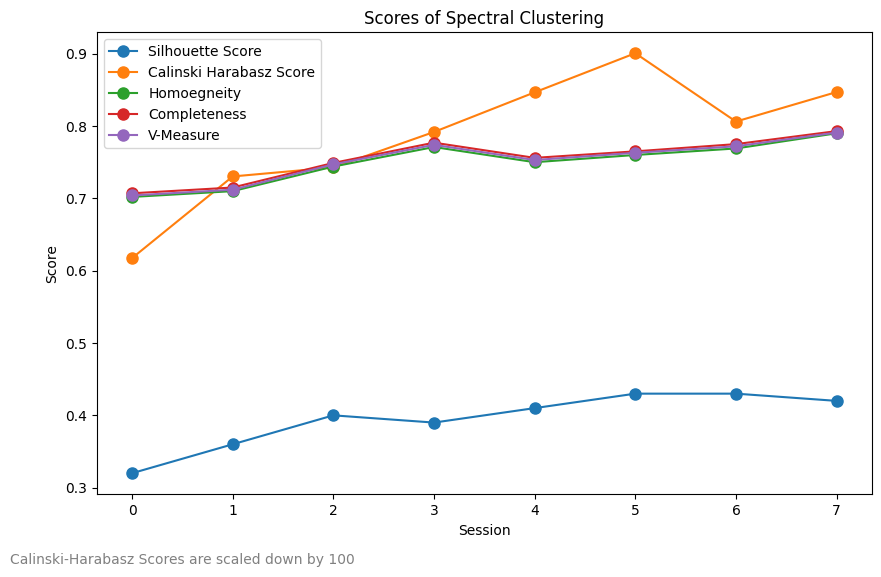

In [67]:
import matplotlib.pyplot as plt


silhouette_scores = [0.32, 0.36, 0.40, 0.39, 0.41, 0.43, 0.43, 0.42]
ch_scores = [61.74/100, 73.03/100, 74.28/100, 79.18/100, 84.66/100, 90.07/100, 80.62/100, 84.70/100]
h_scores = [0.702, 0.710, 0.744, 0.771, 0.750, 0.76, 0.769, 0.79]
c_scores = [0.707, 0.715, 0.749, 0.777, 0.756, 0.765, 0.775, 0.793]
v_scores = [0.704, 0.712, 0.747, 0.774, 0.753, 0.763, 0.772, 0.791]


list_names = ['Silhouette Score', 'Calinski Harabasz Score', 'Homoegneity', 'Completeness', 'V-Measure']
list_values = [
    silhouette_scores,
    ch_scores,
    h_scores,
    c_scores,
    v_scores
]


plt.figure(figsize=(10, 6))


for name, values in zip(list_names, list_values):
    plt.plot(values, marker='o', label=name, markersize = 8)

# Customize the plot
plt.title('Scores of Spectral Clustering')
plt.xlabel('Session')
plt.ylabel('Score')
plt.legend()

note_text = 'Calinski-Harabasz Scores are scaled down by 100'
plt.text(0.5, 0.2, note_text, ha='center', va='center', fontsize=10, color='gray')


# Show the plot
plt.show()

In [4]:
#Normal K-Means
from sklearn.cluster import KMeans

for session in range(len(session_df)):
  model = KMeans(n_clusters = 51, init = 'k-means++', random_state = 20)

  labels = model.fit_predict(session_df[session].iloc[:, 3:])

  temp = session_df[session].copy()
  temp['Cluster'] = labels

  print(f"For Session {session + 1}:")
  print("Silhouette Score = ", silhouette_score(session_df[session].iloc[:,3:], labels, metric='euclidean'))
  print("Calinski Harabasz Score = ", calinski_harabasz_score(temp.iloc[:, 3:-1], labels))
  print("Adjusted Rand Score = ", metrics.adjusted_rand_score(temp['subject'], labels))
  print("Adjusted Mutual Info Score = ", metrics.adjusted_mutual_info_score(temp['subject'], labels))
  print("Homogeneity Score = ", metrics.homogeneity_score(temp['subject'], labels))
  print("Completeness Score = ", metrics.completeness_score(temp['subject'], labels))
  print("V Measure Score = ", metrics.v_measure_score(temp['subject'], labels))

  print("-*-" * 1000)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Session 1:
Silhouette Score =  0.10401190024119146
Calinski Harabasz Score =  114.42741889838594
Adjusted Rand Score =  0.30537211876802084
Adjusted Mutual Info Score =  0.5763145284603193
Homogeneity Score =  0.5896802588701318
Completeness Score =  0.6685208359296979
V Measure Score =  0.6266304189694217
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Session 2:
Silhouette Score =  0.12426372647227152
Calinski Harabasz Score =  107.05840351574331
Adjusted Rand Score =  0.3456849626491553
Adjusted Mutual Info Score =  0.5949771667765992
Homogeneity Score =  0.6130414539752927
Completeness Score =  0.68066545610909
V Measure Score =  0.6450860509922689
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Session 3:
Silhouette Score =  0.12052029484675247
Calinski Harabasz Score =  116.2758319644143
Adjusted Rand Score =  0.31033509716655744
Adjusted Mutual Info Score =  0.593357363167073
Homogeneity Score =  0.6011687999630497
Completeness Score =  0.6884776051789248
V Measure Score =  0.6418678081939586
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Session 4:
Silhouette Score =  0.13205115327097652
Calinski Harabasz Score =  116.92854935693641
Adjusted Rand Score =  0.3818909069028661
Adjusted Mutual Info Score =  0.6354183383669778
Homogeneity Score =  0.6474049408560247
Completeness Score =  0.7177981655662318
V Measure Score =  0.6807867294454222
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Session 5:
Silhouette Score =  0.14777704658205365
Calinski Harabasz Score =  113.18838918934881
Adjusted Rand Score =  0.4045109738092539
Adjusted Mutual Info Score =  0.6500509176480392
Homogeneity Score =  0.6620005348054564
Completeness Score =  0.7289882563127924
V Measure Score =  0.6938813865753723
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Session 6:
Silhouette Score =  0.14858076629651473
Calinski Harabasz Score =  121.64690103221061
Adjusted Rand Score =  0.4396317089795146
Adjusted Mutual Info Score =  0.6693837447230035
Homogeneity Score =  0.6796558435915976
Completeness Score =  0.7441518328315543
V Measure Score =  0.7104430606441694
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Session 7:
Silhouette Score =  0.16337736236304495
Calinski Harabasz Score =  124.21715711043369
Adjusted Rand Score =  0.365928416398918
Adjusted Mutual Info Score =  0.6325506545574057
Homogeneity Score =  0.6359869816437741
Completeness Score =  0.7225547206728576
V Measure Score =  0.6765127564204699
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Session 8:
Silhouette Score =  0.15265518429148545
Calinski Harabasz Score =  123.27845123437851
Adjusted Rand Score =  0.4353704739919707
Adjusted Mutual Info Score =  0.6809454878759524
Homogeneity Score =  0.6845383461202219
Completeness Score =  0.7589757601468317
V Measure Score =  0.7198378032339544
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

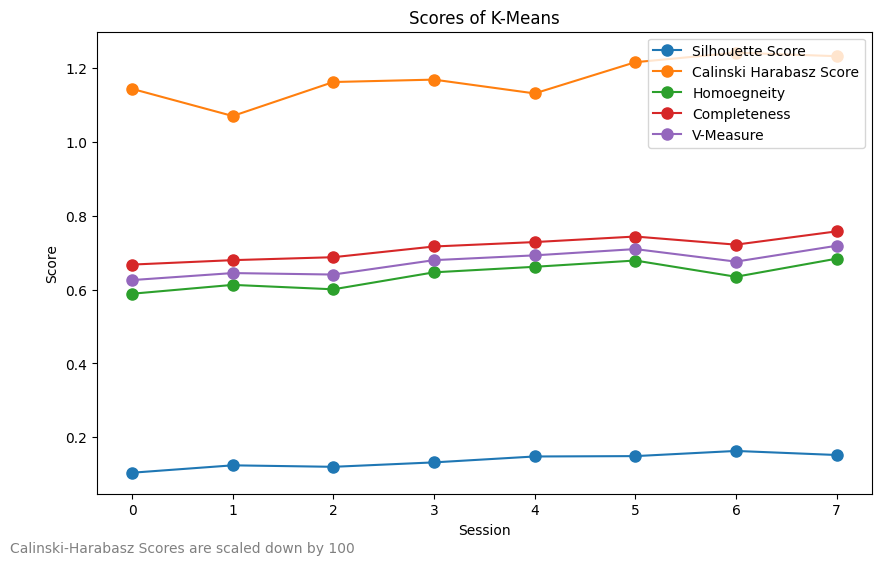

In [72]:
import matplotlib.pyplot as plt


silhouette_scores = [0.104, 0.124, 0.12, 0.132, 0.148, 0.149, 0.163, 0.152]
ch_scores = [114.42/100, 107.06/100, 116.27/100, 116.92/100, 113.18/100, 121.64/100, 124.21/100, 123.27/100]
h_scores = [0.589, 0.613, 0.601, 0.647, 0.662, 0.679, 0.635, 0.684]
c_scores = [0.668, 0.680, 0.688, 0.717, 0.729, 0.744, 0.722, 0.758]
v_scores = [0.626, 0.645, 0.641, 0.680, 0.693, 0.710, 0.676, 0.719]


list_names = ['Silhouette Score', 'Calinski Harabasz Score', 'Homoegneity', 'Completeness', 'V-Measure']
list_values = [
    silhouette_scores,
    ch_scores,
    h_scores,
    c_scores,
    v_scores
]


plt.figure(figsize=(10, 6))


for name, values in zip(list_names, list_values):
    plt.plot(values, marker='o', label=name, markersize = 8)

# Customize the plot
plt.title('Scores of K-Means')
plt.xlabel('Session')
plt.ylabel('Score')
plt.legend()

note_text = 'Calinski-Harabasz Scores are scaled down by 100'
plt.text(0.5, -0.1, note_text, ha='center', va='center', fontsize=10, color='gray')


# Show the plot
plt.show()

In [77]:
#GMM
from sklearn.mixture import GaussianMixture

silhouette_scores = []
ch_scores = []
h_scores = []
c_scores = []
v_scores = []

for session in range(len(session_df)):
  model = GaussianMixture(n_components=51, random_state=0)

  labels = model.fit_predict(session_df[session].iloc[:, 3:])

  temp = session_df[session].copy()
  temp['Cluster'] = labels

  print(f"For Session {session + 1}:")
  print("AIC: ", model.aic(session_df[session].iloc[:,3:]))
  print("BIC: ", model.bic(session_df[session].iloc[:,3:]))

  print("Silhouette Score = ", silhouette_score(session_df[session].iloc[:,3:], labels, metric='euclidean'))
  silhouette_scores.append(silhouette_score(session_df[session].iloc[:,3:], labels, metric='euclidean'))

  print("Calinski Harabasz Score = ", calinski_harabasz_score(temp.iloc[:, 3:-1], labels))
  ch_scores.append(calinski_harabasz_score(temp.iloc[:, 3:-1], labels)/100)

  print("Adjusted Rand Score = ", metrics.adjusted_rand_score(temp['subject'], labels))
  print("Adjusted Mutual Info Score = ", metrics.adjusted_mutual_info_score(temp['subject'], labels))

  print("Homogeneity Score = ", metrics.homogeneity_score(temp['subject'], labels))
  h_scores.append(metrics.homogeneity_score(temp['subject'], labels))

  print("Completeness Score = ", metrics.completeness_score(temp['subject'], labels))
  c_scores.append(metrics.completeness_score(temp['subject'], labels))

  print("V Measure Score = ", metrics.v_measure_score(temp['subject'], labels))
  v_scores.append(metrics.v_measure_score(temp['subject'], labels))

  print("-*-" * 1000)

For Session 1:
AIC:  -191977.15524896779
BIC:  -34619.84296943617
Silhouette Score =  0.07041764192929605
Calinski Harabasz Score =  103.65528716063059
Adjusted Rand Score =  0.30652259634136847
Adjusted Mutual Info Score =  0.5719017159201576
Homogeneity Score =  0.5827752245419938
Completeness Score =  0.6644934059959959
V Measure Score =  0.6209573213092939
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

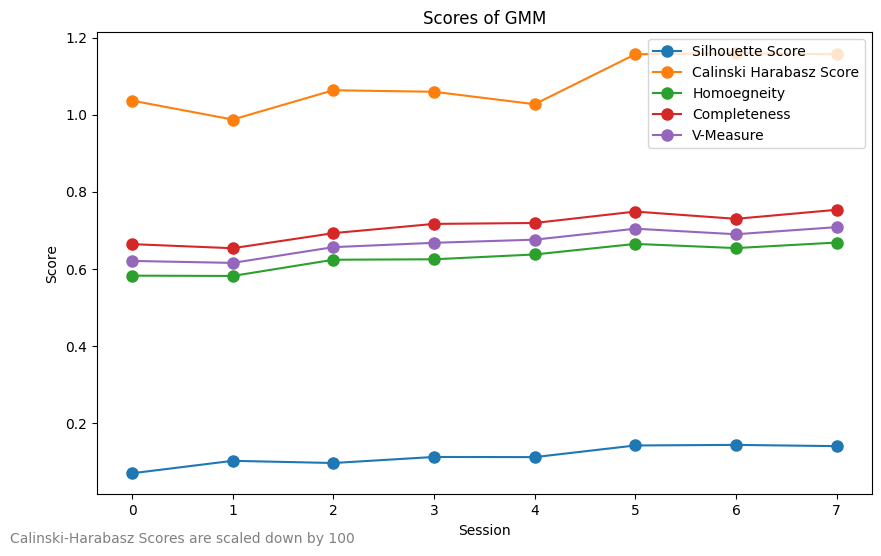

In [78]:
import matplotlib.pyplot as plt


list_names = ['Silhouette Score', 'Calinski Harabasz Score', 'Homoegneity', 'Completeness', 'V-Measure']
list_values = [
    silhouette_scores,
    ch_scores,
    h_scores,
    c_scores,
    v_scores
]


plt.figure(figsize=(10, 6))


for name, values in zip(list_names, list_values):
    plt.plot(values, marker='o', label=name, markersize = 8)

# Customize the plot
plt.title('Scores of GMM')
plt.xlabel('Session')
plt.ylabel('Score')
plt.legend()

note_text = 'Calinski-Harabasz Scores are scaled down by 100'
plt.text(0.5, -0.1, note_text, ha='center', va='center', fontsize=10, color='gray')


# Show the plot
plt.show()

In [79]:
#PCA + Spectral Clustering
from sklearn.decomposition import PCA

silhouette_scores = []
ch_scores = []
h_scores = []
c_scores = []
v_scores = []

for session in range(len(session_df)):
  pca = PCA(n_components = 0.95)
  pca_results = pca.fit_transform(session_df[session].iloc[:, 3:])
  model = SpectralClustering(n_clusters = 51, assign_labels = 'cluster_qr', affinity='nearest_neighbors', n_neighbors = 35)

  labels = model.fit_predict(pca_results)

  temp = session_df[session].copy()
  temp['Cluster'] = labels

  print(f"For Session {session + 1}:")
  print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

  print("Silhouette Score = ", silhouette_score(1-model.affinity_matrix_.toarray(), labels, metric='precomputed'))
  silhouette_scores.append(silhouette_score(1-model.affinity_matrix_.toarray(), labels, metric='precomputed'))

  print("Calinski Harabasz Score = ", calinski_harabasz_score(pca_results, labels))
  ch_scores.append(calinski_harabasz_score(pca_results, labels)/100)

  print("Adjusted Rand Score = ", metrics.adjusted_rand_score(temp['subject'], labels))
  print("Adjusted Mutual Info Score = ", metrics.adjusted_mutual_info_score(temp['subject'], labels))

  print("Homogeneity Score = ", metrics.homogeneity_score(temp['subject'], labels))
  h_scores.append(metrics.homogeneity_score(temp['subject'], labels))

  print("Completeness Score = ", metrics.completeness_score(temp['subject'], labels))
  c_scores.append(metrics.completeness_score(temp['subject'], labels))

  print("V Measure Score = ", metrics.v_measure_score(temp['subject'], labels))
  v_scores.append(metrics.v_measure_score(temp['subject'], labels))

  print("-*-" * 1000)

For Session 1:
Explained Variance Ratio:  [0.25546913 0.17311426 0.07060599 0.05808345 0.05452583 0.04862171
 0.04583319 0.03846612 0.03553202 0.03243387 0.03020124 0.02507691
 0.02149636 0.02060091 0.01801045 0.01488783 0.01433323]
Silhouette Score =  0.3072368811056924
Calinski Harabasz Score =  64.62436306162843
Adjusted Rand Score =  0.44572446442700264
Adjusted Mutual Info Score =  0.6224743160282631
Homogeneity Score =  0.674051431684387
Completeness Score =  0.6793132449550785
V Measure Score =  0.6766721094880759
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

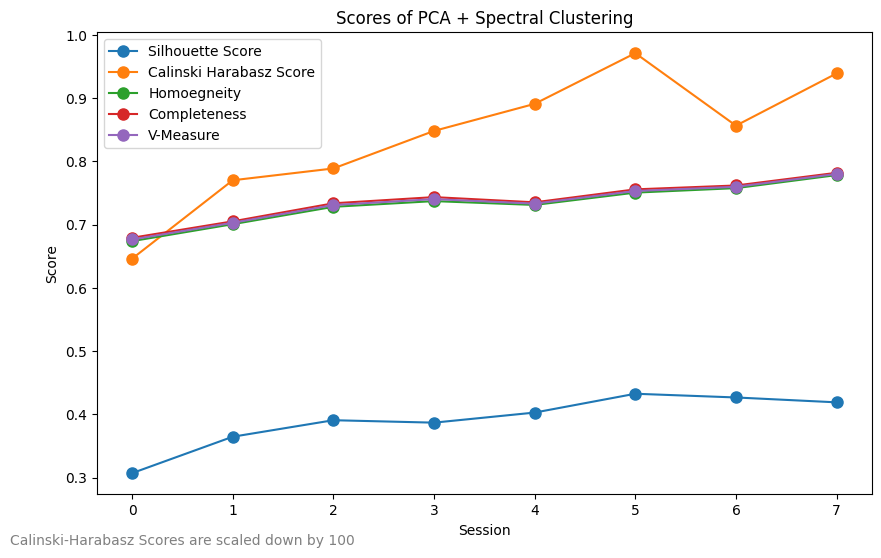

In [82]:
import matplotlib.pyplot as plt


list_names = ['Silhouette Score', 'Calinski Harabasz Score', 'Homoegneity', 'Completeness', 'V-Measure']
list_values = [
    silhouette_scores,
    ch_scores,
    h_scores,
    c_scores,
    v_scores
]


plt.figure(figsize=(10, 6))


for name, values in zip(list_names, list_values):
    plt.plot(values, marker='o', label=name, markersize = 8)

# Customize the plot
plt.title('Scores of PCA + Spectral Clustering')
plt.xlabel('Session')
plt.ylabel('Score')
plt.legend()

note_text = 'Calinski-Harabasz Scores are scaled down by 100'
plt.text(0.5, 0.2, note_text, ha='center', va='center', fontsize=10, color='gray')


# Show the plot
plt.show()

In [84]:
#PCA+K-Means

silhouette_scores = []
ch_scores = []
h_scores = []
c_scores = []
v_scores = []

for session in range(len(session_df)):
  pca = PCA(n_components = 0.95)
  pca_results = pca.fit_transform(session_df[session].iloc[:, 3:])
  model = KMeans(n_clusters = 51, init = 'k-means++', random_state = 20)
  labels = model.fit_predict(pca_results)

  temp = session_df[session].copy()
  temp['Cluster'] = labels

  print(f"For Session {session + 1}:")
  print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

  print("Silhouette Score = ", silhouette_score(pca_results, labels, metric='euclidean'))
  silhouette_scores.append(silhouette_score(pca_results, labels, metric='euclidean'))

  print("Calinski Harabasz Score = ", calinski_harabasz_score(pca_results, labels))
  ch_scores.append(calinski_harabasz_score(pca_results, labels)/100)

  print("Adjusted Rand Score = ", metrics.adjusted_rand_score(temp['subject'], labels))
  print("Adjusted Mutual Info Score = ", metrics.adjusted_mutual_info_score(temp['subject'], labels))

  print("Homogeneity Score = ", metrics.homogeneity_score(temp['subject'], labels))
  h_scores.append(metrics.homogeneity_score(temp['subject'], labels))

  print("Completeness Score = ", metrics.completeness_score(temp['subject'], labels))
  c_scores.append(metrics.completeness_score(temp['subject'], labels))

  print("V Measure Score = ", metrics.v_measure_score(temp['subject'], labels))
  v_scores.append(metrics.v_measure_score(temp['subject'], labels))

  print("-*-" * 1000)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 1:
Explained Variance Ratio:  [0.25546913 0.17311426 0.07060599 0.05808345 0.05452583 0.04862171
 0.04583319 0.03846612 0.03553202 0.03243387 0.03020124 0.02507691
 0.02149636 0.02060091 0.01801045 0.01488783 0.01433323]
Silhouette Score =  0.11490738236115204
Calinski Harabasz Score =  130.2142378373927
Adjusted Rand Score =  0.26808247271214625
Adjusted Mutual Info Score =  0.5444355055623473
Homogeneity Score =  0.5526271260149199
Completeness Score =  0.6468006976501586
V Measure Score =  0.5960168733698841
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 2:
Explained Variance Ratio:  [0.2506054  0.17205678 0.06264296 0.06017232 0.05244557 0.04944677
 0.04691748 0.04255289 0.03990442 0.0342776  0.03274634 0.02818052
 0.02277542 0.01896538 0.01659688 0.01619459 0.01274748]
Silhouette Score =  0.12803133878064296
Calinski Harabasz Score =  119.16805288394595
Adjusted Rand Score =  0.3188145934780825
Adjusted Mutual Info Score =  0.575473612067921
Homogeneity Score =  0.5953462304350234
Completeness Score =  0.6655692491865037
V Measure Score =  0.628502306460048
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 3:
Explained Variance Ratio:  [0.27126011 0.17578754 0.06595509 0.05553158 0.04860008 0.04369912
 0.0416691  0.04052103 0.03756644 0.03561606 0.03153749 0.02900837
 0.02012544 0.01915096 0.01649854 0.01418032 0.01301775]
Silhouette Score =  0.13767484331564092
Calinski Harabasz Score =  130.1758560539795
Adjusted Rand Score =  0.3275344158015657
Adjusted Mutual Info Score =  0.5971969575620597
Homogeneity Score =  0.6044595145454733
Completeness Score =  0.6906956726449439
V Measure Score =  0.6447066345636931
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 4:
Explained Variance Ratio:  [0.27222284 0.17166389 0.06268894 0.05683772 0.05098946 0.04367216
 0.04155055 0.0388513  0.03862297 0.03354443 0.03113309 0.02955184
 0.02251352 0.01899177 0.01668124 0.01526489 0.01322482]
Silhouette Score =  0.141257573266458
Calinski Harabasz Score =  128.95474528600914
Adjusted Rand Score =  0.34050718214622233
Adjusted Mutual Info Score =  0.6076553888560213
Homogeneity Score =  0.6161438914854889
Completeness Score =  0.6987887452956706
V Measure Score =  0.6548691618251963
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 5:
Explained Variance Ratio:  [0.27393312 0.1606029  0.06757641 0.05320696 0.05138815 0.0444307
 0.04067461 0.03913545 0.03806727 0.03637368 0.03250352 0.02578409
 0.02439941 0.02247603 0.01716141 0.01598011 0.0133641 ]
Silhouette Score =  0.1544511144398606
Calinski Harabasz Score =  130.0247769354941
Adjusted Rand Score =  0.38089641307214755
Adjusted Mutual Info Score =  0.6313356560773423
Homogeneity Score =  0.6426214101292314
Completeness Score =  0.7148073358586218
V Measure Score =  0.676795005996281
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 6:
Explained Variance Ratio:  [0.25473088 0.17438245 0.0694453  0.05793925 0.05115478 0.04804769
 0.04691242 0.04379703 0.0403216  0.0353938  0.02957505 0.02538204
 0.02189363 0.01995742 0.01610447 0.01464789 0.01217747]
Silhouette Score =  0.16970319913665438
Calinski Harabasz Score =  136.03995821844885
Adjusted Rand Score =  0.4073539574842341
Adjusted Mutual Info Score =  0.65363771525528
Homogeneity Score =  0.6653735955787067
Completeness Score =  0.7320110784856703
V Measure Score =  0.6971034566721155
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 7:
Explained Variance Ratio:  [0.24900855 0.16461908 0.07054488 0.05625404 0.05386309 0.05000426
 0.04693017 0.04419103 0.0406353  0.03467976 0.03462166 0.02826318
 0.02361365 0.02052065 0.01641266 0.01435109 0.01268786]
Silhouette Score =  0.17280431530025062
Calinski Harabasz Score =  139.0972893252781
Adjusted Rand Score =  0.390886025659719
Adjusted Mutual Info Score =  0.6475332826871132
Homogeneity Score =  0.6534007932654378
Completeness Score =  0.7310945341467712
V Measure Score =  0.6900676934120125
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 8:
Explained Variance Ratio:  [0.28991971 0.18014778 0.06118028 0.05677915 0.04907    0.04315917
 0.03982973 0.03903623 0.03515204 0.03255393 0.02986059 0.02682533
 0.02067478 0.02021999 0.01577354 0.01308172]
Silhouette Score =  0.1714787563943282
Calinski Harabasz Score =  139.74470906082132
Adjusted Rand Score =  0.37724408563580847
Adjusted Mutual Info Score =  0.6545298157792978
Homogeneity Score =  0.658872885050819
Completeness Score =  0.7406367849732862
V Measure Score =  0.6973663787284972
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

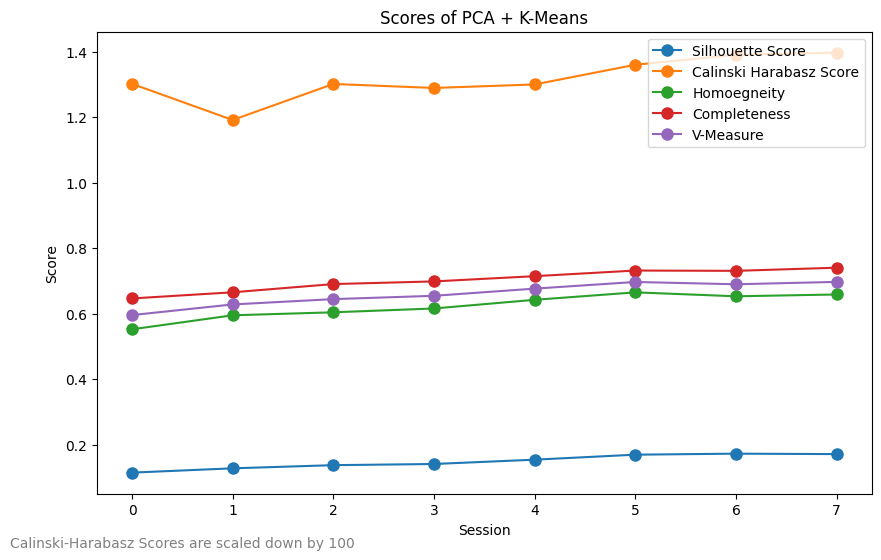

In [88]:
import matplotlib.pyplot as plt


list_names = ['Silhouette Score', 'Calinski Harabasz Score', 'Homoegneity', 'Completeness', 'V-Measure']
list_values = [
    silhouette_scores,
    ch_scores,
    h_scores,
    c_scores,
    v_scores
]


plt.figure(figsize=(10, 6))


for name, values in zip(list_names, list_values):
    plt.plot(values, marker='o', label=name, markersize = 8)

# Customize the plot
plt.title('Scores of PCA + K-Means')
plt.xlabel('Session')
plt.ylabel('Score')
plt.legend()

note_text = 'Calinski-Harabasz Scores are scaled down by 100'
plt.text(0.5, -0.1, note_text, ha='center', va='center', fontsize=10, color='gray')


# Show the plot
plt.show()

In [89]:
#PCA+GMM

silhouette_scores = []
ch_scores = []
h_scores = []
c_scores = []
v_scores = []

for session in range(len(session_df)):
  pca = PCA(n_components = 0.95)
  pca_results = pca.fit_transform(session_df[session].iloc[:, 3:])
  model = GaussianMixture(n_components=51, random_state=0)
  labels = model.fit_predict(pca_results)

  temp = session_df[session].copy()
  temp['Cluster'] = labels

  print(f"For Session {session + 1}:")
  print("AIC: ", model.aic(pca_results))
  print("BIC: ", model.bic(pca_results))
  print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

  print("Silhouette Score = ", silhouette_score(pca_results, labels, metric='euclidean'))
  silhouette_scores.append(silhouette_score(pca_results, labels, metric='euclidean'))

  print("Calinski Harabasz Score = ", calinski_harabasz_score(pca_results, labels))
  ch_scores.append(calinski_harabasz_score(pca_results, labels)/100)

  print("Adjusted Rand Score = ", metrics.adjusted_rand_score(temp['subject'], labels))
  print("Adjusted Mutual Info Score = ", metrics.adjusted_mutual_info_score(temp['subject'], labels))

  print("Homogeneity Score = ", metrics.homogeneity_score(temp['subject'], labels))
  h_scores.append(metrics.homogeneity_score(temp['subject'], labels))

  print("Completeness Score = ", metrics.completeness_score(temp['subject'], labels))
  c_scores.append(metrics.completeness_score(temp['subject'], labels))

  print("V Measure Score = ", metrics.v_measure_score(temp['subject'], labels))
  v_scores.append(metrics.v_measure_score(temp['subject'], labels))

  print("-*-" * 1000)

For Session 1:
AIC:  72184.02678596831
BIC:  123142.38691065786
Explained Variance Ratio:  [0.25546913 0.17311426 0.07060599 0.05808345 0.05452583 0.04862171
 0.04583319 0.03846612 0.03553202 0.03243387 0.03020124 0.02507691
 0.02149636 0.02060091 0.01801045 0.01488783 0.01433323]
Silhouette Score =  0.06518545356722236
Calinski Harabasz Score =  111.21894940068444
Adjusted Rand Score =  0.2717330491044656
Adjusted Mutual Info Score =  0.5297198402286785
Homogeneity Score =  0.5491145514486997
Completeness Score =  0.6239805280625401
V Measure Score =  0.5841585967994022
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

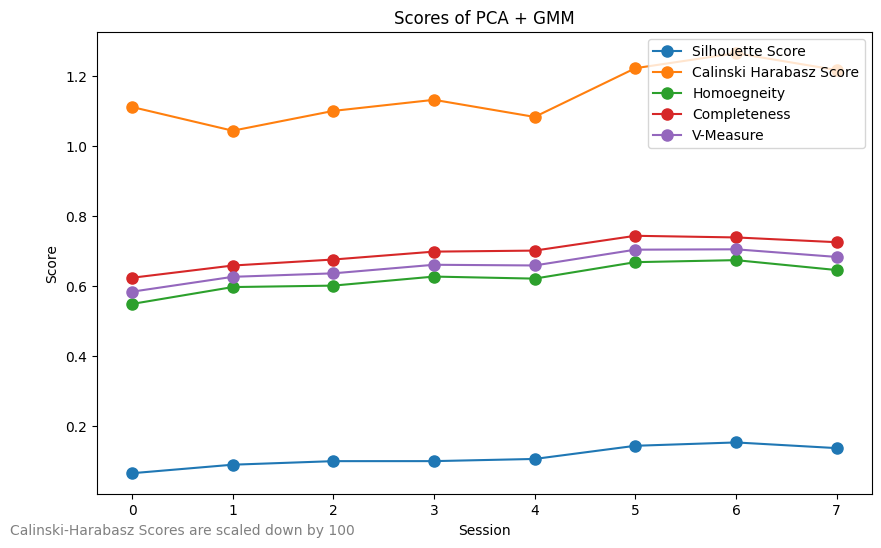

In [90]:
import matplotlib.pyplot as plt


list_names = ['Silhouette Score', 'Calinski Harabasz Score', 'Homoegneity', 'Completeness', 'V-Measure']
list_values = [
    silhouette_scores,
    ch_scores,
    h_scores,
    c_scores,
    v_scores
]


plt.figure(figsize=(10, 6))


for name, values in zip(list_names, list_values):
    plt.plot(values, marker='o', label=name, markersize = 8)

# Customize the plot
plt.title('Scores of PCA + GMM')
plt.xlabel('Session')
plt.ylabel('Score')
plt.legend()

note_text = 'Calinski-Harabasz Scores are scaled down by 100'
plt.text(0.5, -0.1, note_text, ha='center', va='center', fontsize=10, color='gray')


# Show the plot
plt.show()

In [100]:
#TSNE with 2 dimensions + Spectral Clustering
from sklearn.manifold import TSNE

silhouette_scores = []
ch_scores = []
h_scores = []
c_scores = []
v_scores = []

for session in range(len(session_df)):
  pca = TSNE(n_components=2, n_iter=5000, random_state = 20)
  pca_results = pca.fit_transform(session_df[session].iloc[:, 3:])
  model = SpectralClustering(n_clusters = 51, assign_labels = 'cluster_qr', affinity='nearest_neighbors', n_neighbors = 49, random_state = 20)

  labels = model.fit_predict(pca_results)

  temp = session_df[session].copy()
  temp['Cluster'] = labels

  print(f"For Session {session + 1}:")

  print("Silhouette Score = ", silhouette_score(1-model.affinity_matrix_.toarray(), labels, metric='precomputed'))
  silhouette_scores.append(silhouette_score(1-model.affinity_matrix_.toarray(), labels, metric='precomputed'))

  print("Calinski Harabasz Score = ", calinski_harabasz_score(pca_results, labels))
  ch_scores.append(calinski_harabasz_score(pca_results, labels)/100)

  print("Adjusted Rand Score = ", metrics.adjusted_rand_score(temp['subject'], labels))
  print("Adjusted Mutual Info Score = ", metrics.adjusted_mutual_info_score(temp['subject'], labels))

  print("Homogeneity Score = ", metrics.homogeneity_score(temp['subject'], labels))
  h_scores.append(metrics.homogeneity_score(temp['subject'], labels))

  print("Completeness Score = ", metrics.completeness_score(temp['subject'], labels))
  c_scores.append(metrics.completeness_score(temp['subject'], labels))

  print("V Measure Score = ", metrics.v_measure_score(temp['subject'], labels))
  v_scores.append(metrics.v_measure_score(temp['subject'], labels))

  print("-*-" * 1000)

ch_scores = [i/100 for i in ch_scores]

For Session 1:
Silhouette Score =  0.7009224205701748
Calinski Harabasz Score =  4744.73693497566
Adjusted Rand Score =  0.5308203331331308
Adjusted Mutual Info Score =  0.6919020843667131
Homogeneity Score =  0.7344614280600568
Completeness Score =  0.7379979592272556
V Measure Score =  0.7362254466495439
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



For Session 2:
Silhouette Score =  0.745189870069429
Calinski Harabasz Score =  5379.122952328081
Adjusted Rand Score =  0.5586239555313274
Adjusted Mutual Info Score =  0.7048451082172521
Homogeneity Score =  0.7456214711026444
Completeness Score =  0.7490137362390511
V Measure Score =  0.7473137540817644
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



For Session 3:
Silhouette Score =  0.7695497472133012
Calinski Harabasz Score =  6159.483605520357
Adjusted Rand Score =  0.6284136985880355
Adjusted Mutual Info Score =  0.7498254908865997
Homogeneity Score =  0.7842549929328746
Completeness Score =  0.7874364210291115
V Measure Score =  0.7858424870471556
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



For Session 4:
Silhouette Score =  0.7827367212831808
Calinski Harabasz Score =  6157.074021593047
Adjusted Rand Score =  0.6651655992683182
Adjusted Mutual Info Score =  0.7807550369485398
Homogeneity Score =  0.8110788442429533
Completeness Score =  0.8136400982281622
V Measure Score =  0.8123574524180857
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



For Session 5:
Silhouette Score =  0.7716075262284523
Calinski Harabasz Score =  6074.337955154808
Adjusted Rand Score =  0.6237428499414258
Adjusted Mutual Info Score =  0.7515148703789997
Homogeneity Score =  0.7855700625816229
Completeness Score =  0.7890181726743298
V Measure Score =  0.7872903422081728
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



For Session 6:
Silhouette Score =  0.796894541680835
Calinski Harabasz Score =  7284.9684617128605
Adjusted Rand Score =  0.6683212929593849
Adjusted Mutual Info Score =  0.7790366671707865
Homogeneity Score =  0.809523876937921
Completeness Score =  0.8122206668683821
V Measure Score =  0.8108700296647063
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



For Session 8:
Silhouette Score =  0.8029905808050066
Calinski Harabasz Score =  7404.452907144759
Adjusted Rand Score =  0.6925484481944908
Adjusted Mutual Info Score =  0.8022917742826593
Homogeneity Score =  0.8288700127442088
Completeness Score =  0.8326605735171835
V Measure Score =  0.8307609693008815
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

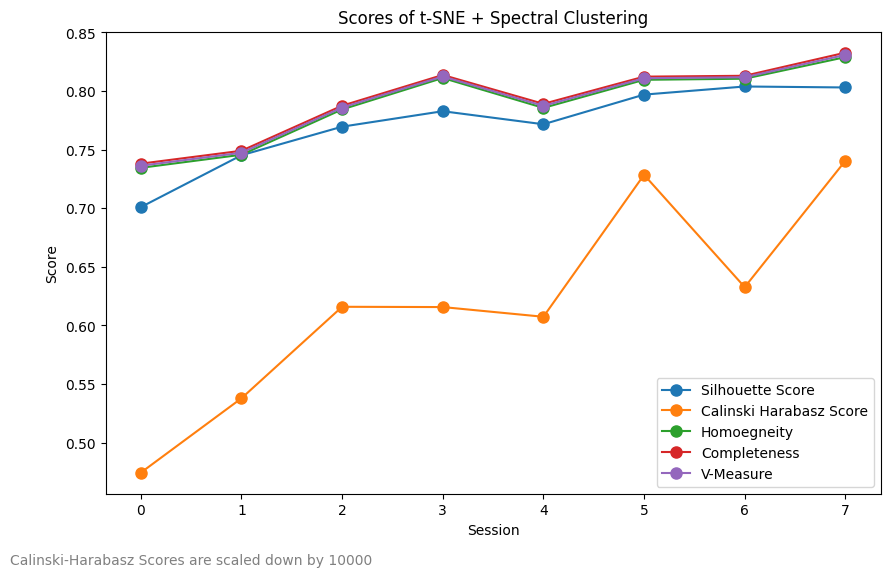

In [107]:
import matplotlib.pyplot as plt


list_names = ['Silhouette Score', 'Calinski Harabasz Score', 'Homoegneity', 'Completeness', 'V-Measure']
list_values = [
    silhouette_scores,
    ch_scores,
    h_scores,
    c_scores,
    v_scores
]


plt.figure(figsize=(10, 6))


for name, values in zip(list_names, list_values):
    plt.plot(values, marker='o', label=name, markersize = 8)

# Customize the plot
plt.title('Scores of t-SNE + Spectral Clustering')
plt.xlabel('Session')
plt.ylabel('Score')
plt.legend()

note_text = 'Calinski-Harabasz Scores are scaled down by 10000'
plt.text(0.5, 0.4, note_text, ha='center', va='center', fontsize=10, color='gray')


# Show the plot
plt.show()

In [108]:
#TSNE in 2 dimensions + K-Means

silhouette_scores = []
ch_scores = []
h_scores = []
c_scores = []
v_scores = []


for session in range(len(session_df)):
  pca = TSNE(n_components=2, n_iter=5000)
  pca_results = pca.fit_transform(session_df[session].iloc[:, 3:])
  model = KMeans(n_clusters = 51, init = 'k-means++', random_state = 20)
  labels = model.fit_predict(pca_results)

  temp = session_df[session].copy()
  temp['Cluster'] = labels

  print(f"For Session {session + 1}:")

  print("Silhouette Score = ", silhouette_score(pca_results, labels, metric='euclidean'))
  silhouette_scores.append(silhouette_score(pca_results, labels, metric='euclidean'))

  print("Calinski Harabasz Score = ", calinski_harabasz_score(pca_results, labels))
  ch_scores.append(calinski_harabasz_score(pca_results, labels)/10000)

  print("Adjusted Rand Score = ", metrics.adjusted_rand_score(temp['subject'], labels))
  print("Adjusted Mutual Info Score = ", metrics.adjusted_mutual_info_score(temp['subject'], labels))

  print("Homogeneity Score = ", metrics.homogeneity_score(temp['subject'], labels))
  h_scores.append(metrics.homogeneity_score(temp['subject'], labels))

  print("Completeness Score = ", metrics.completeness_score(temp['subject'], labels))
  c_scores.append(metrics.completeness_score(temp['subject'], labels))

  print("V Measure Score = ", metrics.v_measure_score(temp['subject'], labels))
  v_scores.append(metrics.v_measure_score(temp['subject'], labels))


  print("-*-" * 1000)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 1:
Silhouette Score =  0.498325
Calinski Harabasz Score =  4714.941336900894
Adjusted Rand Score =  0.526681531385149
Adjusted Mutual Info Score =  0.6936250401816443
Homogeneity Score =  0.7346394751806863
Completeness Score =  0.7404734222042645
V Measure Score =  0.7375449123084012
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 2:
Silhouette Score =  0.5574188
Calinski Harabasz Score =  5474.725122505169
Adjusted Rand Score =  0.5700907951077357
Adjusted Mutual Info Score =  0.7140545352046203
Homogeneity Score =  0.7519469403347919
Completeness Score =  0.7582149889825208
V Measure Score =  0.7550679566384277
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 3:
Silhouette Score =  0.5730516
Calinski Harabasz Score =  6354.648715607761
Adjusted Rand Score =  0.6003354630756872
Adjusted Mutual Info Score =  0.7440698206926881
Homogeneity Score =  0.7767990273410944
Completeness Score =  0.7846409671713882
V Measure Score =  0.7807003051705647
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 4:
Silhouette Score =  0.5824891
Calinski Harabasz Score =  6428.722495000749
Adjusted Rand Score =  0.6441278276089439
Adjusted Mutual Info Score =  0.7766154202975962
Homogeneity Score =  0.8040378925262471
Completeness Score =  0.8131128639531575
V Measure Score =  0.808549915212811
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 5:
Silhouette Score =  0.5764229
Calinski Harabasz Score =  6656.3411701774985
Adjusted Rand Score =  0.6108917916965462
Adjusted Mutual Info Score =  0.7485602498831915
Homogeneity Score =  0.7808580599561017
Completeness Score =  0.7883123404360137
V Measure Score =  0.7845674945671919
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 6:
Silhouette Score =  0.60027313
Calinski Harabasz Score =  7578.673830547861
Adjusted Rand Score =  0.6475581607805854
Adjusted Mutual Info Score =  0.7701495955545417
Homogeneity Score =  0.800500906237106
Completeness Score =  0.8058012306457529
V Measure Score =  0.8031423236859466
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 7:
Silhouette Score =  0.6174413
Calinski Harabasz Score =  6898.252865398445
Adjusted Rand Score =  0.6470141037030984
Adjusted Mutual Info Score =  0.7740901881901027
Homogeneity Score =  0.8023412013776493
Completeness Score =  0.8104796712556201
V Measure Score =  0.806389902513694
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For Session 8:
Silhouette Score =  0.6111537
Calinski Harabasz Score =  7509.029482871685
Adjusted Rand Score =  0.6827251894254431
Adjusted Mutual Info Score =  0.8001560869894087
Homogeneity Score =  0.8247674833094008
Completeness Score =  0.8327617703711176
V Measure Score =  0.8287453485604088
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

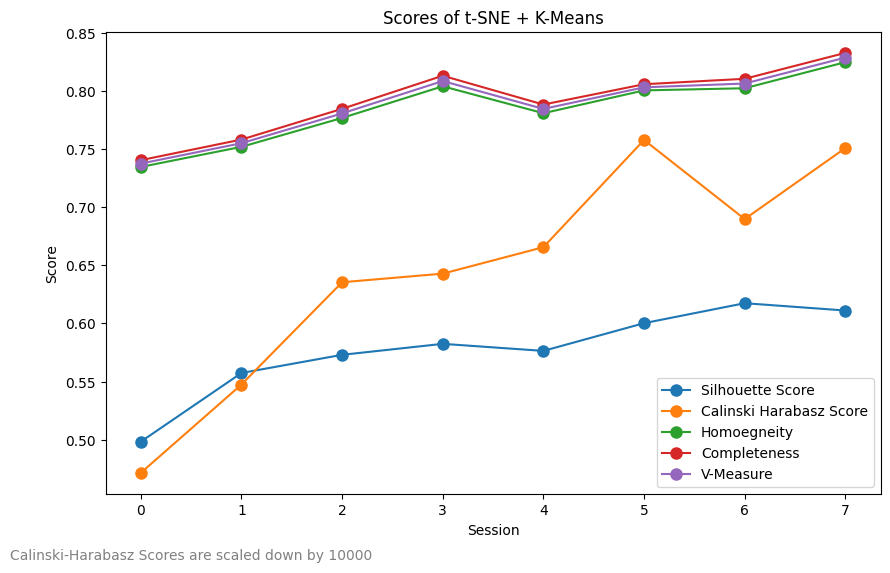

In [109]:
import matplotlib.pyplot as plt


list_names = ['Silhouette Score', 'Calinski Harabasz Score', 'Homoegneity', 'Completeness', 'V-Measure']
list_values = [
    silhouette_scores,
    ch_scores,
    h_scores,
    c_scores,
    v_scores
]


plt.figure(figsize=(10, 6))


for name, values in zip(list_names, list_values):
    plt.plot(values, marker='o', label=name, markersize = 8)

# Customize the plot
plt.title('Scores of t-SNE + K-Means')
plt.xlabel('Session')
plt.ylabel('Score')
plt.legend()

note_text = 'Calinski-Harabasz Scores are scaled down by 10000'
plt.text(0.5, 0.4, note_text, ha='center', va='center', fontsize=10, color='gray')


# Show the plot
plt.show()

In [110]:
#T-SNE with GMM
silhouette_scores = []
ch_scores = []
h_scores = []
c_scores = []
v_scores = []


for session in range(len(session_df)):
  pca = TSNE(n_components=2, n_iter=5000)
  pca_results = pca.fit_transform(session_df[session].iloc[:, 3:])
  model = GaussianMixture(n_components=51, random_state=0)
  labels = model.fit_predict(pca_results)

  temp = session_df[session].copy()
  temp['Cluster'] = labels

  print(f"For Session {session + 1}:")
  print("AIC: ", model.aic(pca_results))
  print("BIC: ", model.bic(pca_results))

  print("Silhouette Score = ", silhouette_score(pca_results, labels, metric='euclidean'))
  silhouette_scores.append(silhouette_score(pca_results, labels, metric='euclidean'))

  print("Calinski Harabasz Score = ", calinski_harabasz_score(pca_results, labels))
  ch_scores.append(calinski_harabasz_score(pca_results, labels)/10000)

  print("Adjusted Rand Score = ", metrics.adjusted_rand_score(temp['subject'], labels))
  print("Adjusted Mutual Info Score = ", metrics.adjusted_mutual_info_score(temp['subject'], labels))

  print("Homogeneity Score = ", metrics.homogeneity_score(temp['subject'], labels))
  h_scores.append(metrics.homogeneity_score(temp['subject'], labels))

  print("Completeness Score = ", metrics.completeness_score(temp['subject'], labels))
  c_scores.append(metrics.completeness_score(temp['subject'], labels))

  print("V Measure Score = ", metrics.v_measure_score(temp['subject'], labels))
  v_scores.append(metrics.v_measure_score(temp['subject'], labels))

  print("-*-" * 1000)

For Session 1:
AIC:  45446.48564687848
BIC:  47228.859481514985
Silhouette Score =  0.45200118
Calinski Harabasz Score =  3778.265210908457
Adjusted Rand Score =  0.5052920278204133
Adjusted Mutual Info Score =  0.6835978658479416
Homogeneity Score =  0.7229037099920399
Completeness Score =  0.7341530725428888
V Measure Score =  0.7284849653147777
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

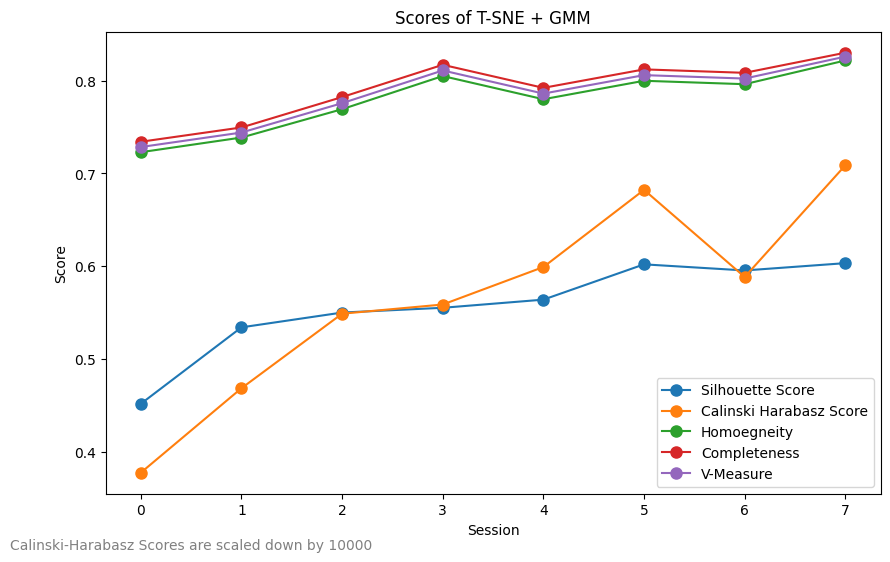

In [113]:
import matplotlib.pyplot as plt


list_names = ['Silhouette Score', 'Calinski Harabasz Score', 'Homoegneity', 'Completeness', 'V-Measure']
list_values = [
    silhouette_scores,
    ch_scores,
    h_scores,
    c_scores,
    v_scores
]


plt.figure(figsize=(10, 6))

for name, values in zip(list_names, list_values):
    plt.plot(values, marker='o', label=name, markersize = 8)

# Customize the plot
plt.title('Scores of T-SNE + GMM')
plt.xlabel('Session')
plt.ylabel('Score')
plt.legend()

note_text = 'Calinski-Harabasz Scores are scaled down by 10000'
plt.text(0.5, 0.3, note_text, ha='center', va='center', fontsize=10, color='gray')


# Show the plot
plt.show()

The Best Result: TSNE + Spectral Clustering

## Now Perform Anomaly Detection for a single bootstrapped test observation:

Users separate better over time as indicated by the clustering metrics - Silhouette Score and Calinski Harabasz Score.

So, we will take the last session of the users to create clusters

In [4]:
from sklearn.manifold import TSNE
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn import metrics

X = session_df[7].copy()
X = X.reset_index()
X.drop(columns = ['index'], inplace = True)

tsne = TSNE(n_components=2, n_iter=5000, random_state = 20)
tsne_results = tsne.fit_transform(X.iloc[:, 3:])

model = SpectralClustering(n_clusters = 51, assign_labels = 'cluster_qr', affinity='nearest_neighbors', n_neighbors = 49, random_state = 20)
labels = model.fit_predict(tsne_results)

X['Cluster'] = labels

print("Silhouette Score = ", silhouette_score(1-model.affinity_matrix_.toarray(), labels, metric='precomputed'))
print("Calinski Harabasz Score = ", calinski_harabasz_score(tsne_results, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score =  0.8029905808050066
Calinski Harabasz Score =  7404.452907144759


In [5]:
#Identify the majority class users in each cluster

from collections import Counter

temp = X.copy()

classes = set(session_df[7]['subject'])
majority_classes = []
for i in set(labels):

  print("In Cluster", i)
  print("No. of Observations: ", len(temp[temp['Cluster'] == i]))
  x = temp[temp['Cluster'] == i]['subject'].value_counts()
  if len(x) >= 1:
    majority_class = x.index[0]
  else:
    majority_class = 'a'
  majority_classes.append(majority_class)
  print("Majority Class: ", majority_class)

  if majority_class == 'a':
    print("No Majority Class")
    continue;
  print("No. of Observations of Majority Class: ", len(temp.loc[(temp['subject'] == majority_class) & (temp['Cluster'] == i)]))
  print("Majority Class Ratio: ", len(temp.loc[(temp['subject'] == majority_class) & (temp['Cluster'] == i)])/len(temp[temp['Cluster'] == i]))
  print("-" * 100)



non_majority_classes = classes - set(majority_classes)
print("Non Majority Classes: ", non_majority_classes, '\n')

print("For Majority Class: ")

frequency_counter = Counter(majority_classes)

for value, frequency in frequency_counter.items():
  if frequency > 1:
    print(f"Value: {value}, Frequency: {frequency}")

In Cluster 0
No. of Observations:  50
Majority Class:  s040
No. of Observations of Majority Class:  7
Majority Class Ratio:  0.14
----------------------------------------------------------------------------------------------------
In Cluster 1
No. of Observations:  36
Majority Class:  s050
No. of Observations of Majority Class:  35
Majority Class Ratio:  0.9722222222222222
----------------------------------------------------------------------------------------------------
In Cluster 2
No. of Observations:  36
Majority Class:  s047
No. of Observations of Majority Class:  7
Majority Class Ratio:  0.19444444444444445
----------------------------------------------------------------------------------------------------
In Cluster 3
No. of Observations:  34
Majority Class:  s018
No. of Observations of Majority Class:  6
Majority Class Ratio:  0.17647058823529413
----------------------------------------------------------------------------------------------------
In Cluster 4
No. of Observation

In [15]:
#Visualizing the T-SNE Results
import plotly.express as px

fig = px.scatter(tsne_results, x=tsne_results[:,0], y=tsne_results[:,1], color=X['subject'].values)
fig.update_layout(width=800, height=600, title = 'T-SNE Visualization for Session 8')
fig.show()

Now Lets create the test observations

In [16]:
session_df[7].head()

subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t       H.t  \
0    s002             8    1  1.318532     0.830081     0.533024  1.973854   
1    s002             8    2  1.342635     0.301532     0.021829  1.548668   
2    s002             8    3  0.978082    -0.208252    -0.394078  0.561031   
3    s002             8    4  1.240198     1.292326     0.991481  2.211557   
4    s002             8    5  1.430007     0.006295    -0.278415  0.232934   

     DD.t.i    UD.t.i       H.i  ...       H.a    DD.a.n    UD.a.n       H.n  \
0  0.680865 -0.000641  0.250167  ...  1.517602  0.615975  0.017416  0.485603   
1  0.347947 -0.180226  0.374431  ...  1.112517  0.649050  0.206172  0.424163   
2 -0.558330 -0.725675  0.270318  ...  1.286125  0.939880  0.423967 -0.174069   
3  0.048551 -0.689981  1.025975  ...  1.205108  0.164333 -0.304250  0.288348   
4 -0.454294 -0.515973  1.032692  ...  1.228256 -0.738951 -1.197769  0.598782   

     DD.n.l    UD.n.l       H.l  DD.l.Return  UD.l.Return  H.Return  
0  1.137755  0.945776  0.209019    -0.293788    -0.319543  0.361712  
1  0.794042  0.639400  0.730956    -0.089537    -0.204286  0.465178  
2  0.028652  0.068960  1.736036     0.169259    -0.113322  0.605356  
3 -0.072786 -0.137903  1.372796    -0.213712    -0.428021  0.922428  
4 -0.109672 -0.247603  1.549126     0.052627    -0.196941  0.728847  

[5 rows x 34 columns]

In [17]:
#Create a Bootstrapped Dataset

num_bootstrap_samples = 100

bootstrapped_df = session_df[7].sample(n=num_bootstrap_samples, replace=True)
bootstrapped_df.head()

subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t       H.t  \
45      s002             8   46  1.652956    -0.082526    -0.407862 -0.808270   
1662    s039             8   13 -0.630768    -0.358998    -0.218486 -0.095162   
2059    s048             8   10 -0.058331     0.033192     0.043404  1.016348   
1710    s040             8   11  0.782248     0.603649     0.422755  1.421447   
1008    s026             8    9  0.372504    -0.024980    -0.098029 -0.289342   

        DD.t.i    UD.t.i       H.i  ...       H.a    DD.a.n    UD.a.n  \
45   -0.335229 -0.054182  0.465109  ...  0.357324  0.272681  0.129106   
1662 -0.829982 -0.769177  0.062092  ... -0.059334  0.024050  0.046456   
2059 -0.208073 -0.539397 -1.691032  ... -0.354467 -0.573577 -0.424875   
1710 -0.505156 -0.961032  1.842085  ...  0.820278  0.891978  0.556878   
1008 -0.210385 -0.106608 -0.129341  ... -0.941839  1.051650  1.393434   

           H.n    DD.n.l    UD.n.l       H.l  DD.l.Return  UD.l.Return  \
45   -0.274313  0.159430  0.215488  0.283078     0.045083    -0.001455   
1662 -0.167601  0.080628  0.115974 -0.203593     1.827640     1.812161   
2059 -0.293715 -0.215301 -0.130067 -0.221225    -0.672117    -0.618988   
1710  0.941553  1.101707  0.801599  0.635738     0.640429     0.521725   
1008 -0.180536  0.420987  0.437238  1.270525    -0.094179    -0.295249   

      H.Return  
45    0.335012  
1662  0.391751  
2059  0.391751  
1710  1.493156  
1008  0.078017  

[5 rows x 34 columns]

In [18]:
#Add Noise to each Sample
from tqdm import tqdm

for i in tqdm(range(len(bootstrapped_df))):
  for j in range(3, len(bootstrapped_df.columns)):
    bootstrapped_df.iloc[i, j] = round(bootstrapped_df.iloc[i, j] + np.random.normal(0, 0.01, 1)[0], 6)

bootstrapped_df.head()

100%|██████████| 100/100 [00:00<00:00, 236.74it/s]


subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t       H.t  \
45      s002             8   46  1.652033    -0.086601    -0.414018 -0.810255   
1662    s039             8   13 -0.622800    -0.363981    -0.228429 -0.103541   
2059    s048             8   10 -0.050237     0.026882     0.043833  1.009591   
1710    s040             8   11  0.780978     0.608508     0.423492  1.427485   
1008    s026             8    9  0.372044    -0.026751    -0.092315 -0.293717   

        DD.t.i    UD.t.i       H.i  ...       H.a    DD.a.n    UD.a.n  \
45   -0.330903 -0.063082  0.485930  ...  0.360879  0.287676  0.131853   
1662 -0.844393 -0.788610  0.060699  ... -0.066862  0.028010  0.052779   
2059 -0.208297 -0.538182 -1.687452  ... -0.361133 -0.573652 -0.416847   
1710 -0.502524 -0.981115  1.832232  ...  0.824698  0.883025  0.544320   
1008 -0.210221 -0.112634 -0.127091  ... -0.938312  1.053305  1.371083   

           H.n    DD.n.l    UD.n.l       H.l  DD.l.Return  UD.l.Return  \
45   -0.251784  0.150337  0.219284  0.280043     0.056839     0.008597   
1662 -0.162390  0.069079  0.126699 -0.213296     1.837403     1.818833   
2059 -0.288281 -0.211232 -0.116595 -0.223015    -0.668941    -0.622575   
1710  0.954574  1.104281  0.799304  0.654601     0.637970     0.513983   
1008 -0.198683  0.412283  0.453758  1.273481    -0.096129    -0.277490   

      H.Return  
45    0.322840  
1662  0.370426  
2059  0.382158  
1710  1.491669  
1008  0.076937  

[5 rows x 34 columns]

In [6]:
#Find the Centroid for Each Cluster
#Find the average distance of every obs from the cluster centroid

centroids = {}

Y = np.c_[tsne_results, labels]

for i in range(51):
  l=[]
  cluster_df = Y[Y[:, -1] == i]
  cluster_df = cluster_df[:, :-1]
  l.append(np.mean(cluster_df, axis = 0))

  distances = np.linalg.norm(cluster_df - l[0], axis=1)

  l.append(np.mean(distances) + 2*(np.std(distances)))

  centroids[i] = l

In [20]:
#Pick the 15th test observation and add 2 more observations with noise
#This simulates the fact that this test observation is re-typing the same text

bootstrapped_df_final = bootstrapped_df.iloc[:, 3:].copy()
bootstrapped_df_final = bootstrapped_df_final.reset_index()
bootstrapped_df_final.drop(columns = ['index'], inplace = True)

new_row_1 = np.array(bootstrapped_df_final.iloc[14, :]) + np.random.normal(0, 0.001, 1)
new_row_2 = new_row_1 + np.random.normal(0, 0.1, 1)

bootstrapped_df_final.loc[len(bootstrapped_df_final)] = new_row_1
bootstrapped_df_final.loc[len(bootstrapped_df_final)] = new_row_2

In [21]:
bootstrapped_df.iloc[14, 0]

's034'

In [22]:
#Finding the distance from the 15th test observation to the each centroid


tsne_bootstrapped = tsne.fit_transform(bootstrapped_df_final)

distances = []

for i in range(51):
  distances.append(np.linalg.norm(tsne_bootstrapped[14] - centroids[i][0]))


#Find the closest cluster
closest_cluster = np.argmin(distances)

print("Closest Cluster is: ", closest_cluster)

Closest Cluster is:  24


In [23]:
centroids[closest_cluster]

[array([-4.57619536, -7.71091054]), 6.558368750808475]

In [24]:
def mimick_check(user, centroid, threshold):
  print("Distance between Observation and Nearest Centroid and Threshold Value Respectively: ", np.linalg.norm(user - centroid), threshold)
  if np.linalg.norm(user - centroid) <= threshold:
    return 1
  else:
    return 0

In [25]:
#Now Check if the User is the actual user or a mimicker
#Closest Cluster has a True Majority (This can be seen in the second code block from the start of this section)

check_successful = 0

for i in range(3):
  if i == 1:
    check_successful += mimick_check(tsne_bootstrapped[14], centroids[closest_cluster][0], centroids[closest_cluster][1])
  elif i == 2:
    check_successful += mimick_check(tsne_bootstrapped[-2], centroids[closest_cluster][0], centroids[closest_cluster][1])
  else:
    check_successful += mimick_check(tsne_bootstrapped[-1], centroids[closest_cluster][0], centroids[closest_cluster][1])
  print(check_successful)


print(check_successful)

if check_successful >= 2:
  print("User is not a  Mimicker")
else:
  print("User is a Mimicker")



Distance between Observation and Nearest Centroid and Threshold Value Respectively:  7.602279976091789 6.558368750808475
0
Distance between Observation and Nearest Centroid and Threshold Value Respectively:  7.5657987236521675 6.558368750808475
0
Distance between Observation and Nearest Centroid and Threshold Value Respectively:  7.5656867573440305 6.558368750808475
0
0
User is a Mimicker


Since Cluster 24 has a true majority, and the successful check is less than 2, the test observation is classified as a Mimicker

In [26]:
tsne_bootstrapped = np.vstack([tsne_bootstrapped, centroids[closest_cluster][0]])

In [27]:
#Add a columns for shape in plot
tsne_bootstrapped = np.c_[tsne_bootstrapped, [1]*102 + [0]]

In [28]:
fig = px.scatter(tsne_bootstrapped, x=tsne_bootstrapped[:,0], y=tsne_bootstrapped[:,1], color=list(bootstrapped_df_final.index) + [f"Closest Cluster: {closest_cluster}"], symbol = tsne_bootstrapped[:, -1])
fig.update_layout(width=800, height=600, title = 'T-SNE Visualization for Bootstrapped Data')
fig.show()

## Anomaly Detection for All Bootstrapped Test Data

In [178]:
#Create a Bootstrapped Dataset

num_bootstrap_samples = 510 #20% of the size of the 8th Session's data

bootstrapped_df = session_df[7].sample(n=num_bootstrap_samples, replace=True)

In [179]:
#Add Noise to each Sample
from tqdm import tqdm

for i in tqdm(range(len(bootstrapped_df))):
  for j in range(3, len(bootstrapped_df.columns)):
    bootstrapped_df.iloc[i, j] = round(bootstrapped_df.iloc[i, j] + np.random.normal(0, 0.01, 1)[0], 6)

100%|██████████| 510/510 [00:02<00:00, 237.82it/s]


In [7]:
#Find the Centroid for Each Cluster
#Find the average distance of every obs from the cluster centroid

centroids = {}

Y = np.c_[tsne_results, labels]

for i in range(51):
  l=[]
  cluster_df = Y[Y[:, -1] == i]
  cluster_df = cluster_df[:, :-1]
  l.append(np.mean(cluster_df, axis = 0))

  distances = np.linalg.norm(cluster_df - l[0], axis=1)

  l.append(np.mean(distances) + 2*(np.std(distances)))

  centroids[i] = l

In [181]:
range(len(bootstrapped_df))

range(0, 510)

In [182]:
#Find Details of Each Cluster on the Dataset with Cluster Labels (i.e. Session 8)
classes_df = pd.DataFrame()
classes_df['Cluster'] = range(51)
classes_df['majority_class_user'] = majority_classes

classes_df['centroid_x1'] = 0
classes_df['centroid_x2'] = 0
classes_df['threshold'] = 0

for i in range(51):
  classes_df.loc[i, 'centroid_x1'] = centroids[i][0][0]
  classes_df.loc[i, 'centroid_x2'] = centroids[i][0][1]
  classes_df.loc[i, 'threshold'] = centroids[i][1]

In [183]:
#Calculate number of observations in each cluster and the number of observations with the majority class user

classes_df['cluster_size'] = 0
classes_df['mcu_size'] = 0

for i in range(51):
  cluster_size = len(X.loc[X['Cluster'] == i])

  majority_class_user = classes_df.loc[i, 'majority_class_user']

  maj_class_obs_size = len(X.loc[(X['Cluster'] == i) & (X['subject'] == majority_class_user)])

  classes_df.loc[i, 'cluster_size'] = cluster_size
  classes_df.loc[i, 'mcu_size'] = maj_class_obs_size

In [184]:
#Mark every majority class user as a true majority if it has more than 50% of the observations of the cluster

import numpy as np

classes_df['true_majority'] = np.where((classes_df['mcu_size'] / classes_df['cluster_size']) > 0.5, 1, 0)

In [185]:
classes_df

Cluster majority_class_user  centroid_x1  centroid_x2  threshold  \
0         0                s040   -15.849866    15.476985   3.958347   
1         1                s050    47.550549   -25.734918   6.824081   
2         2                s047   -25.603372   -44.844305   3.640930   
3         3                s018    25.330733    31.897521   7.422623   
4         4                s015   -42.790756     8.252851   6.479049   
5         5                s020     7.924273   -32.104532  10.260228   
6         6                s024   -25.374056    49.508745   5.567808   
7         7                s035    61.074928    18.075860   4.258783   
8         8                s040     9.718194    -0.035534   4.956254   
9         9                s028   -27.948886   -18.222851   8.953268   
10       10                s047    26.974020     8.993206   8.252787   
11       11                s031    -4.013834    31.490636   8.552489   
12       12                s018   -27.958086   -66.932894   3.800860   
13       13                s033    37.441645   -65.557267   4.233176   
14       14                s056    -5.994320   -22.778666   5.987545   
15       15                s004     4.865075    47.063702   3.871804   
16       16                s048    65.295166    34.328003   4.847631   
17       17                s029   -46.488301    28.914228   3.872502   
18       18                s011   -47.634086   -43.426855   3.986748   
19       19                s046    43.366558     9.548712   4.149472   
20       20                s051     8.366190   -53.630040   4.534968   
21       21                s021    29.052159   -14.475433  12.646156   
22       22                s039   -44.715012   -24.198405   7.282901   
23       23                s027   -28.469880     2.278666   7.504843   
24       24                s026   -18.190095    33.989457   5.602086   
25       25                s002     8.238243    25.960557   6.470197   
26       26                s041    -5.227852    -7.910781   8.461203   
27       27                s053   -26.092107    63.368070   3.994340   
28       28                s003   -12.861547     3.040616   8.464204   
29       29                s037     0.284730    18.016677   8.323774   
30       30                s005   -21.459796   -26.841024   4.589525   
31       31                s055    47.076815   -11.897384   5.836886   
32       32                s030   -15.829494    44.084371   5.223134   
33       33                s019    22.101439    43.839777   4.122176   
34       34                s012    61.053320     1.924186   6.202257   
35       35                s044   -41.399783   -13.699073   5.326589   
36       36                s022   -52.502246     7.982297   4.145575   
37       37                s017    19.592113   -37.788837   4.996360   
38       38                s042   -29.981061   -33.102723   6.722528   
39       39                s054   -14.592741   -33.906611   7.521161   
40       40                s049   -26.022823    13.091200   5.907802   
41       41                s052    -4.883035    40.980776   5.277716   
42       42                s010    47.672516    21.098522   5.925398   
43       43                s043   -28.801006    38.465301   7.890955   
44       44                s016    14.097771    14.292770   5.751904   
45       45                s036     5.285429   -18.683562   4.937122   
46       46                s008   -11.713132   -14.902121   5.831770   
47       47                s025   -32.094103    -3.550112   4.568092   
48       48                s013    10.843998    36.507451   3.208132   
49       49                s007    18.560889    -3.066947   5.246486   
50       50                s038    -4.516397     9.316903   6.500668   

    cluster_size  mcu_size  true_majority  
0             50         7              0  
1             36        35              1  
2             36         7              0  
3             34         6              0  
4             41        31             

In [186]:
#Classify Each Test Observation as Mimicker or Not a Mimicker

for i in range(len(bootstrapped_df)):

  bootstrapped_df_final = bootstrapped_df.iloc[:, 3:].copy()
  bootstrapped_df_final = bootstrapped_df_final.reset_index()
  bootstrapped_df_final.drop(columns = ['index'], inplace = True)

  new_row_1 = np.array(bootstrapped_df_final.iloc[i, :]) + np.random.normal(0, 0.001, 1)
  new_row_2 = new_row_1 + np.random.normal(0, 0.1, 1)

  bootstrapped_df_final.loc[len(bootstrapped_df_final)] = new_row_1
  bootstrapped_df_final.loc[len(bootstrapped_df_final)] = new_row_2

  tsne_bootstrapped = tsne.fit_transform(bootstrapped_df_final)

  distances = []

  for j in range(51):
    distances.append(np.linalg.norm(tsne_bootstrapped[i] - centroids[j][0]))

  closest_cluster = np.argmin(distances)

  print(f"For Observation = {i}")
  print("Closest Cluster is: ", closest_cluster)

  check_successful = 0

  for k in range(3):
    if k == 1:
      check_successful += mimick_check(tsne_bootstrapped[i], centroids[closest_cluster][0], centroids[closest_cluster][1])
    elif k == 2:
      check_successful += mimick_check(tsne_bootstrapped[-2], centroids[closest_cluster][0], centroids[closest_cluster][1])
    else:
      check_successful += mimick_check(tsne_bootstrapped[-1], centroids[closest_cluster][0], centroids[closest_cluster][1])


  tm_flag = classes_df.loc[closest_cluster, 'true_majority']

  if tm_flag == 1:
    if check_successful >= 2:
      print(f"User of observation {i} is not a  Mimicker")
    else:
      print(f"User of observation {i} is a Mimicker")
  else:
    print(f"User of observation {i} is not a  Mimicker")

  print("-*-" * 1000)


For Observation = 0
Closest Cluster is:  28
User of observation 0 is not a  Mimicker
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

## Additional Analysis Using Labeled Test Data

In [8]:
#Create Labeled Test Data by Taking Observations from the 6th Session
test_df = session_df[5]
subjects = test_df['subject']
test_df = test_df.iloc[:, 3:]
test_df['subject'] = subjects
test_df

H.period  DD.period.t  UD.period.t       H.t    DD.t.i    UD.t.i  \
0     0.025633    -0.552857    -0.537149 -0.579137 -0.533128 -0.375168   
1     0.141733    -0.553506    -0.559025 -0.508790 -0.547627 -0.407447   
2    -0.326081    -0.729378    -0.642779 -0.342179 -0.504132 -0.407447   
3    -0.363643    -0.685248    -0.593401 -0.597650 -0.500266 -0.338141   
4    -0.841702    -0.784541    -0.601527 -0.334774 -0.280859 -0.190033   
...        ...          ...          ...       ...       ...       ...   
2545  0.182709    -0.632681    -0.642779  0.035473 -0.459671 -0.460614   
2546 -0.121199    -0.690440    -0.642779  0.035473 -0.370748 -0.373269   
2547  0.633450    -0.675513    -0.766534 -0.101519 -0.482868 -0.448272   
2548 -0.032417    -0.691089    -0.659654  0.142844 -0.416176 -0.445424   
2549 -0.851946    -0.904602    -0.715282 -0.727236 -0.635583 -0.437828   

           H.i    DD.i.e    UD.i.e       H.e  ...    DD.a.n    UD.a.n  \
0    -0.789476 -0.677757 -0.468025 -0.625131  ... -0.595703 -0.631561   
1    -0.577168 -0.396253 -0.245739 -0.615521  ... -0.661556 -0.527043   
2    -0.472813 -0.301525 -0.178879 -0.480985  ... -0.883063 -0.809240   
3    -0.872241 -0.528515 -0.303047 -0.378482  ... -0.574151 -0.463172   
4    -0.559176 -0.266672 -0.124176 -0.573879  ... -1.202751 -1.084468   
...        ...       ...       ...       ...  ...       ...       ...   
2545 -0.076984 -0.835935 -0.793639 -0.862170  ... -0.877077 -0.566528   
2546 -0.220922 -0.598221 -0.527938 -0.903812  ... -0.407722 -0.196072   
2547  0.056158 -0.519579 -0.518386 -1.089600  ...  0.503449  1.036069   
2548  0.293656 -0.675970 -0.727648 -0.599505  ...  0.528593  0.368320   
2549 -0.418836 -0.653628 -0.534016  0.201304  ... -0.713042 -0.570012   

           H.n    DD.n.l    UD.n.l       H.l  DD.l.Return  UD.l.Return  \
0    -0.770110 -0.262625 -0.065223 -0.243955    -0.491136    -0.441044   
1    -0.638016 -0.244628 -0.078873 -0.895538    -0.591392    -0.434154   
2    -0.628581 -0.087357  0.063378 -0.754033    -0.616321    -0.481324   
3    -1.078327 -0.199247  0.063378 -0.806686     0.013936     0.143550   
4    -0.531084  1.054233  1.089313  0.322067    -0.212046    -0.259253   
...        ...       ...       ...       ...          ...          ...   
2545  0.006724 -0.668715 -0.615549  0.789365    -0.364326    -0.483444   
2546 -0.317219 -0.813467 -0.674461  1.101993    -0.342650    -0.512594   
2547  0.818154  0.018274 -0.170115  0.239797     0.004181    -0.034531   
2548 -0.732369 -0.765738 -0.535802  0.736712    -0.338314    -0.449524   
2549 -1.285902 -0.841635 -0.479045  0.361557    -0.500349    -0.547574   

      H.Return  subject  
0    -0.875721     s002  
1    -1.425762     s002  
2    -0.857863     s002  
3    -0.850719     s002  
4    -0.697136     s002  
...        ...      ...  
2545  0.202931     s057  
2546  0.638678     s057  
2547  1.278012     s057  
2548  0.024346     s057  
2549  1.070853     s057  

[2550 rows x 32 columns]

In [9]:
#Perform t-SNE on the test observations
test_tsne_results = tsne.fit_transform(test_df.iloc[:, :-1])
test_tsne_results = np.c_[test_tsne_results, subjects]
test_tsne_results

array([[-11.858774185180664, -22.342994689941406, 's002'],
       [-11.555848121643066, -22.365196228027344, 's002'],
       [-10.456122398376465, -22.471561431884766, 's002'],
       ...,
       [-28.063508987426758, -59.23838424682617, 's057'],
       [-7.786906719207764, 4.087650775909424, 's057'],
       [-40.34263229370117, -19.297664642333984, 's057']], dtype=object)

In [10]:
#Find Details of Each Cluster on the Dataset with Cluster Labels (i.e. Session 8)
classes_df = pd.DataFrame()
classes_df['Cluster'] = range(51)
classes_df['majority_class_user'] = majority_classes


classes_df['centroid_x1'] = 0
classes_df['centroid_x2'] = 0
classes_df['threshold'] = 0

for i in range(51):
  classes_df.loc[i, 'centroid_x1'] = centroids[i][0][0]
  classes_df.loc[i, 'centroid_x2'] = centroids[i][0][1]
  classes_df.loc[i, 'threshold'] = centroids[i][1]

In [11]:
X.head()

subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t       H.t  \
0    s002             8    1  1.318532     0.830081     0.533024  1.973854   
1    s002             8    2  1.342635     0.301532     0.021829  1.548668   
2    s002             8    3  0.978082    -0.208252    -0.394078  0.561031   
3    s002             8    4  1.240198     1.292326     0.991481  2.211557   
4    s002             8    5  1.430007     0.006295    -0.278415  0.232934   

     DD.t.i    UD.t.i       H.i  ...    DD.a.n    UD.a.n       H.n    DD.n.l  \
0  0.680865 -0.000641  0.250167  ...  0.615975  0.017416  0.485603  1.137755   
1  0.347947 -0.180226  0.374431  ...  0.649050  0.206172  0.424163  0.794042   
2 -0.558330 -0.725675  0.270318  ...  0.939880  0.423967 -0.174069  0.028652   
3  0.048551 -0.689981  1.025975  ...  0.164333 -0.304250  0.288348 -0.072786   
4 -0.454294 -0.515973  1.032692  ... -0.738951 -1.197769  0.598782 -0.109672   

     UD.n.l       H.l  DD.l.Return  UD.l.Return  H.Return  Cluster  
0  0.945776  0.209019    -0.293788    -0.319543  0.361712       25  
1  0.639400  0.730956    -0.089537    -0.204286  0.465178       25  
2  0.068960  1.736036     0.169259    -0.113322  0.605356       25  
3 -0.137903  1.372796    -0.213712    -0.428021  0.922428       25  
4 -0.247603  1.549126     0.052627    -0.196941  0.728847       25  

[5 rows x 35 columns]

In [12]:
#Calculate number of observations in each cluster and the number of observations with the majority class user

classes_df['cluster_size'] = 0
classes_df['mcu_size'] = 0

for i in range(51):
  cluster_size = len(X.loc[X['Cluster'] == i])

  majority_class_user = classes_df.loc[i, 'majority_class_user']

  maj_class_obs_size = len(X.loc[(X['Cluster'] == i) & (X['subject'] == majority_class_user)])

  classes_df.loc[i, 'cluster_size'] = cluster_size
  classes_df.loc[i, 'mcu_size'] = maj_class_obs_size

In [13]:
#Mark every majority class user as a true majority if it has more than 50% of the observations of the cluster

import numpy as np

classes_df['true_majority'] = np.where((classes_df['mcu_size'] / classes_df['cluster_size']) > 0.5, 1, 0)
classes_df

Cluster majority_class_user  centroid_x1  centroid_x2  threshold  \
0         0                s040     9.797505    30.454285  10.486576   
1         1                s050    13.060141   -29.248008   5.310267   
2         2                s047    18.560889    -3.066947   5.246486   
3         3                s018    13.714009    14.563583   6.790488   
4         4                s015   -30.541808   -30.152287   8.060839   
5         5                s020   -19.349325    33.525806   9.163999   
6         6                s024    51.155798   -26.095082   4.339420   
7         7                s035    -6.096879   -22.677638   7.106184   
8         8                s040    -4.226857    30.693342   8.184686   
9         9                s028    44.112986   -25.391505   4.157226   
10       10                s047    47.672516    21.098522   5.925398   
11       11                s031   -14.607462     1.772274   9.311527   
12       12                s018   -41.961367   -14.727732   6.618320   
13       13                s033    -5.031180    40.959716   5.582675   
14       14                s056   -42.790756     8.252851   6.479049   
15       15                s004   -26.478093    12.425777   6.623608   
16       16                s048   -11.763398   -14.573499   5.761405   
17       17                s029   -21.018370   -27.247187   5.930418   
18       18                s011   -46.488301    28.914228   3.872502   
19       19                s046    -4.312228     9.149720   6.143117   
20       20                s051   -25.346713   -43.921053   6.212208   
21       21                s021     5.107403   -18.599464   5.669356   
22       22                s039   -15.786740    15.389700   5.057579   
23       23                s027     9.718194    -0.035534   4.956254   
24       24                s026    -4.576195    -7.710911   6.558369   
25       25                s002   -15.924833    44.167895   4.978974   
26       26                s041   -25.436129    49.419954   5.728678   
27       27                s053   -47.634086   -43.426855   3.986748   
28       28                s003   -26.092107    63.368070   3.994340   
29       29                s037     4.517916   -34.131941   6.912961   
30       30                s005    22.101439    43.839777   4.122176   
31       31                s055   -52.502246     7.982297   4.145575   
32       32                s030     4.865075    47.063702   3.871804   
33       33                s019    43.058788     8.688467   8.170359   
34       34                s012   -28.905461    39.086462   5.997948   
35       35                s044    47.076815   -11.897384   5.836886   
36       36                s022    61.074928    18.075860   4.258783   
37       37                s017    19.668724   -37.849502   4.856231   
38       38                s042   -27.958086   -66.932894   3.800860   
39       39                s054   -14.172983   -34.168418   5.440382   
40       40                s049    25.666794    32.140527   7.066720   
41       41                s052    37.441645   -65.557267   4.233176   
42       42                s010     8.366190   -53.630040   4.534968   
43       43                s043    61.053320     1.924186   6.202257   
44       44                s016     0.439335    18.085014   7.456015   
45       45                s036    65.295166    34.328003   4.847631   
46       46                s008   -27.398683   -17.326035   7.474107   
47       47                s025    26.974020     8.993206   8.252787   
48       48                s013   -31.006453    -1.024475   7.267962   
49       49                s007   -44.636217   -24.671015   7.506492   
50       50                s038    28.517448   -15.128634  10.760864   

    cluster_size  mcu_size  true_majority  
0             50         7              0  
1             36        35              1  
2             36         7              0  
3             34         6              0  
4             41        31             

In [14]:
def mimick_check(user, centroid, threshold):
  #print("Distance between Observation and Nearest Centroid and Threshold Value Respectively: ", np.linalg.norm(user - centroid), threshold)
  if np.linalg.norm(user - centroid) <= threshold:
    return 1
  else:
    return 0

In [15]:
predictions = []
closest_mcus = []
tm_flags = []
distance_to_closest_centroid = []
thresholds = []

for i in range(test_tsne_results.shape[0]):
  true_subject = test_tsne_results[i, -1]
  distances = []

  for j in range(51):
    distances.append(np.linalg.norm(test_tsne_results[i, :-1] - centroids[j][0]))

  closest_cluster = np.argmin(distances)

  closest_mcu = classes_df.loc[closest_cluster, 'majority_class_user']
  closest_mcus.append(closest_mcu)

  tm_flag = classes_df.loc[closest_cluster, 'true_majority']
  tm_flags.append(tm_flag)

  mimic = mimick_check(test_tsne_results[i, :-1], centroids[closest_cluster][0], centroids[closest_cluster][1])

  distance_to_closest_centroid.append(np.linalg.norm(test_tsne_results[i, :-1] - centroids[closest_cluster][0]))
  thresholds.append(centroids[closest_cluster][1])

  print(f"For Observation {i}")
  print(f"Subject is {subjects[i]}")
  print(f"Closest Majority Class user is {closest_mcu}")
  print(f"True Majority = {tm_flag}")
  print("Mimic Value: ", mimic) #If Mimic == 1 then not a mimicker

  if tm_flag == 1:
    if mimic == 0:
      predictions.append("Mimicker")
    else:
      predictions.append("Not a Mimicker")
  else:
    predictions.append("Not a Mimicker")

  print("-*-" * 1000)


Streaming output truncated to the last 5000 lines.
Mimic Value:  0
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Subject is s036
Closest Majority Class user is s043
True Majority = 1
Mimic Value:  0
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
#Add the Predictions to the Test Dataframe
test_df['predictions'] = predictions
test_df['closest_mcu'] = closest_mcus
test_df['tm_flag'] = tm_flags
test_df['distance_closest_centroid'] = distance_to_closest_centroid
test_df['threshold'] = thresholds
test_df = test_df[['subject', 'predictions', 'closest_mcu', 'tm_flag', 'distance_closest_centroid', 'threshold']]
test_df

subject     predictions closest_mcu  tm_flag  distance_closest_centroid  \
0       s002  Not a Mimicker        s035        1                   5.771605   
1       s002  Not a Mimicker        s035        1                   5.467903   
2       s002  Not a Mimicker        s035        1                   4.364112   
3       s002  Not a Mimicker        s035        1                   3.163485   
4       s002  Not a Mimicker        s035        1                   5.320262   
...      ...             ...         ...      ...                        ...   
2545    s057        Mimicker        s018        1                   7.030148   
2546    s057        Mimicker        s018        1                   7.015562   
2547    s057        Mimicker        s042        1                   7.695232   
2548    s057  Not a Mimicker        s046        1                   6.139865   
2549    s057  Not a Mimicker        s018        1                   4.848153   

      threshold  
0      7.106184  
1      7.106184  
2      7.106184  
3      7.106184  
4      7.106184  
...         ...  
2545   6.618320  
2546   6.618320  
2547   3.800860  
2548   6.143117  
2549   6.618320  

[2550 rows x 6 columns]

In [17]:
#False Negatives
test_df.loc[(test_df['subject'] != test_df['closest_mcu']) & (test_df['tm_flag'] == 1) & (test_df['predictions'] == 'Not a Mimicker')]

subject     predictions closest_mcu  tm_flag  distance_closest_centroid  \
0       s002  Not a Mimicker        s035        1                   5.771605   
1       s002  Not a Mimicker        s035        1                   5.467903   
2       s002  Not a Mimicker        s035        1                   4.364112   
3       s002  Not a Mimicker        s035        1                   3.163485   
4       s002  Not a Mimicker        s035        1                   5.320262   
...      ...             ...         ...      ...                        ...   
2541    s057  Not a Mimicker        s018        1                   6.339633   
2542    s057  Not a Mimicker        s048        1                   4.785969   
2543    s057  Not a Mimicker        s018        1                   4.648456   
2548    s057  Not a Mimicker        s046        1                   6.139865   
2549    s057  Not a Mimicker        s018        1                   4.848153   

      threshold  
0      7.106184  
1      7.106184  
2      7.106184  
3      7.106184  
4      7.106184  
...         ...  
2541   6.618320  
2542   5.761405  
2543   6.618320  
2548   6.143117  
2549   6.618320  

[864 rows x 6 columns]

In [18]:
#True Negatives
test_df.loc[(test_df['subject'] != test_df['closest_mcu']) & (test_df['tm_flag'] == 1) & (test_df['predictions'] == 'Mimicker')]

subject predictions closest_mcu  tm_flag  distance_closest_centroid  \
21      s002    Mimicker        s035        1                   7.393193   
38      s002    Mimicker        s048        1                   6.253316   
43      s002    Mimicker        s048        1                   6.405341   
48      s002    Mimicker        s048        1                   6.391228   
50      s003    Mimicker        s012        1                   6.090783   
...      ...         ...         ...      ...                        ...   
2531    s057    Mimicker        s018        1                   7.503358   
2538    s057    Mimicker        s029        1                   7.397849   
2545    s057    Mimicker        s018        1                   7.030148   
2546    s057    Mimicker        s018        1                   7.015562   
2547    s057    Mimicker        s042        1                   7.695232   

      threshold  
21     7.106184  
38     5.761405  
43     5.761405  
48     5.761405  
50     5.997948  
...         ...  
2531   6.618320  
2538   5.930418  
2545   6.618320  
2546   6.618320  
2547   3.800860  

[1119 rows x 6 columns]

In [19]:
#False Positives
test_df.loc[(test_df['subject'] == test_df['closest_mcu']) & (test_df['tm_flag'] == 1) & (test_df['predictions'] == 'Mimicker')]

subject predictions closest_mcu  tm_flag  distance_closest_centroid  \
140     s004    Mimicker        s004        1                   6.626988   
150     s005    Mimicker        s005        1                  17.663759   
151     s005    Mimicker        s005        1                  19.795496   
152     s005    Mimicker        s005        1                  14.849880   
153     s005    Mimicker        s005        1                  18.599621   
...      ...         ...         ...      ...                        ...   
2225    s051    Mimicker        s051        1                  10.159153   
2228    s051    Mimicker        s051        1                   9.137404   
2235    s051    Mimicker        s051        1                   6.289106   
2247    s051    Mimicker        s051        1                   6.251009   
2426    s055    Mimicker        s055        1                  21.226527   

      threshold  
140    6.623608  
150    4.122176  
151    4.122176  
152    4.122176  
153    4.122176  
...         ...  
2225   6.212208  
2228   6.212208  
2235   6.212208  
2247   6.212208  
2426   4.145575  

[158 rows x 6 columns]

In [20]:
#True Positives
test_df.loc[(test_df['subject'] == test_df['closest_mcu']) & (test_df['tm_flag'] == 1) & (test_df['predictions'] == 'Not a Mimicker')]

subject     predictions closest_mcu  tm_flag  distance_closest_centroid  \
101     s004  Not a Mimicker        s004        1                   4.726659   
121     s004  Not a Mimicker        s004        1                   5.790106   
401     s012  Not a Mimicker        s012        1                   3.982596   
402     s012  Not a Mimicker        s012        1                   1.129831   
406     s012  Not a Mimicker        s012        1                   1.764141   
...      ...             ...         ...      ...                        ...   
1989    s046  Not a Mimicker        s046        1                   5.549196   
2121    s049  Not a Mimicker        s049        1                   6.607436   
2122    s049  Not a Mimicker        s049        1                   3.517681   
2223    s051  Not a Mimicker        s051        1                   6.087089   
2244    s051  Not a Mimicker        s051        1                   6.037948   

      threshold  
101    6.623608  
121    6.623608  
401    5.997948  
402    5.997948  
406    5.997948  
...         ...  
1989   6.143117  
2121   7.066720  
2122   7.066720  
2223   6.212208  
2244   6.212208  

[131 rows x 6 columns]

In [21]:
fp = len(test_df.loc[(test_df['subject'] == test_df['closest_mcu']) & (test_df['tm_flag'] == 1) & (test_df['predictions'] == 'Mimicker')])
tn = len(test_df.loc[(test_df['subject'] != test_df['closest_mcu']) & (test_df['tm_flag'] == 1) & (test_df['predictions'] == 'Mimicker')])

fpr = fp / (fp + tn)
print("False Positive Rate: ", fpr)

False Positive Rate:  0.12372748629600626


In [22]:
fn = len(test_df.loc[(test_df['subject'] != test_df['closest_mcu']) & (test_df['tm_flag'] == 1) & (test_df['predictions'] == 'Not a Mimicker')])
tp = len(test_df.loc[(test_df['subject'] == test_df['closest_mcu']) & (test_df['tm_flag'] == 1) & (test_df['predictions'] == 'Not a Mimicker')])

fnr = fn / (fn + tp)
print("False Negative Rate: ", fnr)

False Negative Rate:  0.8683417085427135


In [23]:
print("Equal Error Rate = ", (fpr+fnr)/2)

Equal Error Rate =  0.4960345974193599
